In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
'''
EDA
'''

'\nEDA\n'

In [6]:
'''
We can see that some of columns contain lists with dictionaries. Some lists contain a single dictionary, some have several. Let's extract data from these columns
'''

"\nWe can see that some of columns contain lists with dictionaries. Some lists contain a single dictionary, some have several. Let's extract data from these columns\n"

In [7]:
import ast

In [8]:

train['belongs_to_collection']=train['belongs_to_collection'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))
train['genres']=train['genres'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))
train['production_companies']=train['production_companies'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))
train['production_countries']=train['production_countries'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))
train['spoken_languages']=train['spoken_languages'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))
train['Keywords']=train['Keywords'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))
train['cast']=train['cast'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))
train['crew']=train['crew'].apply(lambda i:{} if pd.isna(i) else ast.literal_eval(i))

In [9]:
'''
define a function that can count the number of variables in the dictionary
'''

'\ndefine a function that can count the number of variables in the dictionary\n'

In [10]:
def var_occur(column):
  occur = train[column].apply(lambda x: 0 if x=={} else len(x))
  return occur

In [11]:
'''
check whether the movie belongs to a collection
'''


'\ncheck whether the movie belongs to a collection\n'

In [12]:
train['is_collection'] = var_occur('belongs_to_collection')

In [13]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0


In [17]:
train['is_collection'].sum()

604

In [18]:
'''
move to revenue
'''

'\nmove to revenue\n'

In [19]:
train['revenue'].isnull().sum()

0

In [20]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


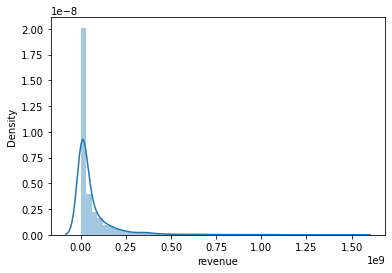

In [21]:
sns.distplot(train['revenue'])

In [22]:
train['log_revenue']=np.log1p(train['revenue'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


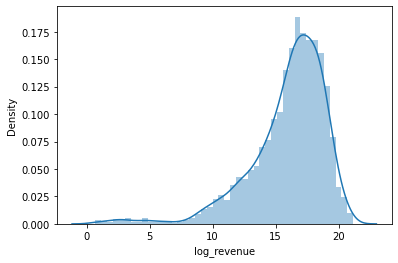

In [23]:
sns.distplot(train['log_revenue'])

In [24]:
'''
move to budget
'''

'\nmove to budget\n'

In [25]:
sum(train['budget']==0)

812

In [26]:
train['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [27]:
sum(train['budget']==0)

812

In [28]:
train.loc[train['budget']==0,'budget']=train['budget'].median()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


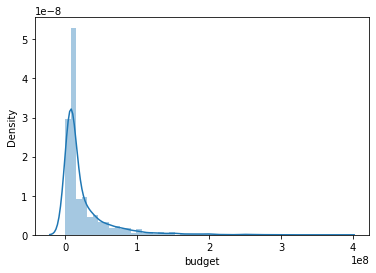

In [29]:
sns.distplot(train['budget'])

In [30]:
train['log_budget'] = np.log1p(train['budget'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


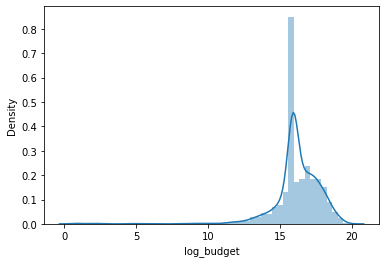

In [31]:
sns.distplot(train['log_budget'],)

In [32]:
'''
revelance of the two
'''

'\nrevelance of the two\n'

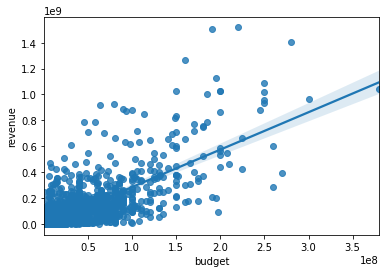

In [33]:
sns.regplot(x="budget", y="revenue", data=train)

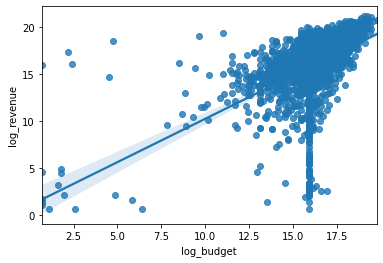

In [34]:
sns.regplot(x="log_budget", y="log_revenue", data=train)

In [35]:
'''
move to genres
'''


'\nmove to genres\n'

In [36]:
#the number of genres
train['genres_num']=var_occur('genres')
train['genres_num'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres_num, dtype: int64

In [37]:
#move to homepage

In [38]:
train['has_homepage'] = 1
train.loc[train['homepage'].isnull(), 'has_homepage'] = 0

In [39]:
train['has_homepage'].sum()

946

In [40]:
#move to orignal language

In [41]:
train['original_language'].unique()

array(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da',
       'fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu',
       'ml', 'bn', 'id'], dtype=object)

In [42]:
train['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
tr       3
hu       3
pl       2
te       2
ml       2
no       2
fi       2
ur       1
he       1
cs       1
el       1
ar       1
mr       1
id       1
sr       1
nb       1
vi       1
bn       1
Name: original_language, dtype: int64

In [43]:
#too many languages, set those who are less than 10 as 'others'

In [44]:
others = [ 'ja','it','ko','cn','zh','de','ta' ,'sr', 'nl', 'cs', 'tr', 'fa', 'sv',  'te', 'pt', 'mr', 'da','fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu', 'ml', 'bn', 'id']

In [45]:
train.loc[train['original_language'].isin(others), 'original_language' ] = 'others'

In [46]:
train['original_language'].value_counts()

en        2575
others     215
fr          78
ru          47
es          43
hi          42
Name: original_language, dtype: int64

In [47]:
languages_dummies = pd.get_dummies(train['original_language'],prefix='o_language',drop_first=True)

In [48]:
languages_dummies

,o_language_es,o_language_fr,o_language_hi,o_language_others,o_language_ru
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
2995,0,0,0,0,0
2996,0,0,0,1,0
2997,0,0,0,0,0
2998,0,0,0,0,0


In [49]:
train=pd.concat([train,languages_dummies],axis=1)

In [50]:
train['companies_num']=var_occur('production_companies')
train['countries_num']=var_occur('production_countries')
train['languages_num']=var_occur('spoken_languages')

In [51]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection,log_revenue,log_budget,genres_num,has_homepage,o_language_es,o_language_fr,o_language_hi,o_language_others,o_language_ru,companies_num,countries_num,languages_num
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,16.326300,16.454568,1,0,0,0,0,0,0,3,1,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,18.370959,17.504390,4,0,0,0,0,0,0,1,1,1
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,16.387512,15.009433,1,1,0,0,0,0,0,3,1,1
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,16.588099,13.997833,2,1,0,0,1,0,0,0,1,2
4,5,{},8000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,others,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,15.182615,15.894952,2,0,0,0,0,1,0,0,1,1


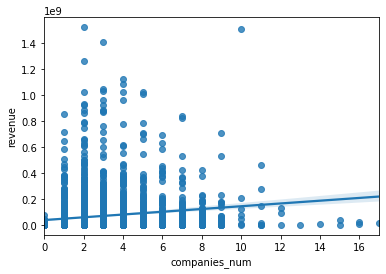

In [52]:
sns.regplot(x="companies_num", y="revenue", data=train)

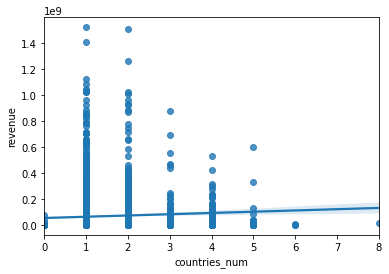

In [53]:
sns.regplot(x="countries_num", y="revenue", data=train)

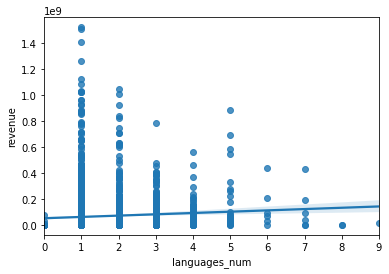

In [54]:
sns.regplot(x="languages_num", y="revenue", data=train)

In [55]:
# move to date

In [56]:
train['release_date']

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

In [57]:
def get_year(x):
  year = x.split('/')[2]
  if int(year) <= 18:
     return '20'+ year
  else:
     return '19' + year

In [58]:
'''
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year
'''

'\ndef fix_date(x):\n    """\n    Fixes dates which are in 20xx\n    """\n    year = x.split(\'/\')[2]\n    if int(year) <= 19:\n        return x[:-2] + \'20\' + year\n    else:\n        return x[:-2] + \'19\' + year\n'

In [59]:
train['release_year'] = train['release_date'].apply(lambda x: get_year(x))
#train['release_date'] = pd.to_datetime(train['release_date'])

In [60]:
train['release_year']=train['release_year'].astype(int)

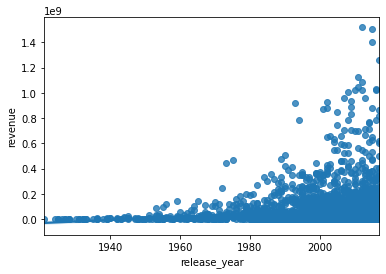

In [61]:
sns.regplot(x="release_year", y="revenue", data=train)

In [62]:
train['budget_to_year'] = train['budget']/train['release_year']

In [63]:
#move to runtime

In [64]:
train['runtime'].fillna((train['runtime'].mean()), inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


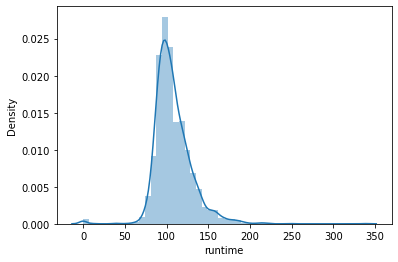

In [65]:
sns.distplot(train['runtime'],label='runtime distribution')

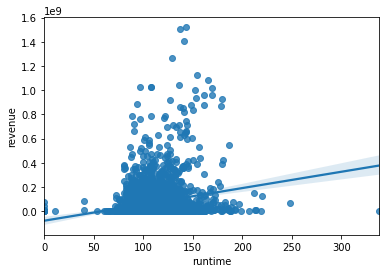

In [66]:
sns.regplot(x="runtime", y="revenue", data=train)

In [67]:
train['cast_num']=var_occur('cast')
train['crew_num']=var_occur('crew')

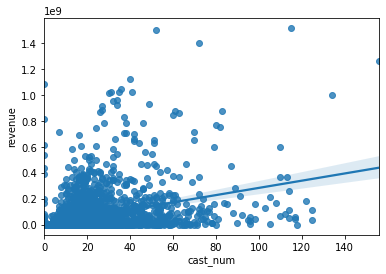

In [68]:
sns.regplot(x="cast_num", y="revenue", data=train)

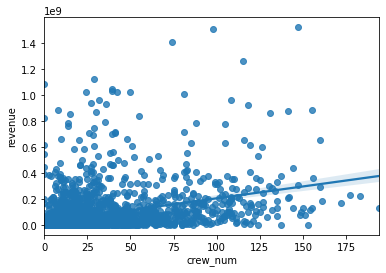

In [69]:
sns.regplot(x="crew_num", y="revenue", data=train)

In [70]:
train.describe()

,id,budget,popularity,runtime,revenue,is_collection,log_revenue,log_budget,genres_num,has_homepage,o_language_es,o_language_fr,o_language_hi,o_language_others,o_language_ru,companies_num,countries_num,languages_num,release_year,budget_to_year,cast_num,crew_num
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.469667e+07,8.463274,107.856571,6.672585e+07,0.201333,15.961986,16.180901,2.503667,0.315333,0.014333,0.026000,0.01400,0.071667,0.015667,2.698333,1.326333,1.452333,1999.713000,12320.445924,20.603667,24.365667
std,866.169729,3.586030e+07,12.104000,22.079069,1.375323e+08,0.401063,3.061311,1.740275,1.117021,0.464726,0.118881,0.159162,0.11751,0.257978,0.124203,2.014121,0.752349,0.887688,15.423313,17847.940390,16.629635,28.066419
min,1.000000,1.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000499,0.000000,0.000000
25%,750.750000,8.000000e+06,4.018053,94.000000,2.379808e+06,0.000000,14.682517,15.894952,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1993.000000,3970.223325,11.000000,8.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,0.000000,16.637310,15.894952,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,1.000000,1.000000,2004.000000,4064.008390,16.000000,14.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,0.000000,18.048445,17.182806,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,1.000000,2.000000,2011.000000,14404.650576,24.000000,28.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,1.000000,21.141685,19.755682,7.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,17.000000,8.000000,9.000000,2017.000000,188960.716062,156.000000,194.000000


In [71]:
y = train['log_revenue']
X = train.drop(['belongs_to_collection','id', 'revenue','log_revenue','budget','genres','homepage','imdb_id','original_language','original_title','overview','poster_path','production_companies','production_countries','release_date','spoken_languages','status','tagline','title','Keywords','cast','crew'], axis=1)

In [72]:
X.head()

,popularity,runtime,is_collection,log_budget,genres_num,has_homepage,o_language_es,o_language_fr,o_language_hi,o_language_others,o_language_ru,companies_num,countries_num,languages_num,release_year,budget_to_year,cast_num,crew_num
0,6.575393,93.0,1,16.454568,1,0,0,0,0,0,0,3,1,1,2015,6947.890819,24,72
1,8.248895,113.0,1,17.504390,4,0,0,0,0,0,0,1,1,1,2004,19960.079840,20,9
2,64.299990,105.0,0,15.009433,1,1,0,0,0,0,0,3,1,1,2014,1638.530288,51,64
3,3.174936,122.0,0,13.997833,2,1,0,0,1,0,0,0,1,2,2012,596.421471,7,3
4,1.148070,118.0,0,15.894952,2,0,0,0,0,1,0,0,1,1,2009,3982.080637,4,2


In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         3000 non-null   float64
 1   runtime            3000 non-null   float64
 2   is_collection      3000 non-null   int64  
 3   log_budget         3000 non-null   float64
 4   genres_num         3000 non-null   int64  
 5   has_homepage       3000 non-null   int64  
 6   o_language_es      3000 non-null   uint8  
 7   o_language_fr      3000 non-null   uint8  
 8   o_language_hi      3000 non-null   uint8  
 9   o_language_others  3000 non-null   uint8  
 10  o_language_ru      3000 non-null   uint8  
 11  companies_num      3000 non-null   int64  
 12  countries_num      3000 non-null   int64  
 13  languages_num      3000 non-null   int64  
 14  release_year       3000 non-null   int64  
 15  budget_to_year     3000 non-null   float64
 16  cast_num           3000 

In [74]:
y.head()

0    16.326300
1    18.370959
2    16.387512
3    16.588099
4    15.182615
Name: log_revenue, dtype: float64

In [75]:
y.describe()

count    3000.000000
mean       15.961986
std         3.061311
min         0.693147
25%        14.682517
50%        16.637310
75%        18.048445
max        21.141685
Name: log_revenue, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state = 100)

In [78]:
X_train.shape

(2400, 18)

In [79]:
y_train.head()

1695    19.229437
54      17.645663
2632    17.325980
1610    16.108259
1113    16.731641
Name: log_revenue, dtype: float64

In [80]:
'''
linear regression
'''


'\nlinear regression\n'

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_valid)

In [82]:
from sklearn.metrics import mean_squared_error as mse
mse(y_valid, y_pred_lr)

5.703980438954275

In [83]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred_lr)

0.3988329356318995

In [84]:
lr_coef = pd.Series(lr.coef_, index = X_train.columns)
lr_imp_coef = pd.concat([lr_coef.sort_values(ascending=True)])
lr_imp_coef

o_language_fr       -1.948533
o_language_es       -0.599948
o_language_ru       -0.402230
o_language_others   -0.262739
countries_num       -0.177787
release_year        -0.023620
budget_to_year       0.000013
crew_num             0.007290
runtime              0.008850
cast_num             0.014075
popularity           0.018540
languages_num        0.095784
companies_num        0.141312
genres_num           0.157849
has_homepage         0.321264
log_budget           0.675713
o_language_hi        0.696521
is_collection        1.109605
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Linear Model')

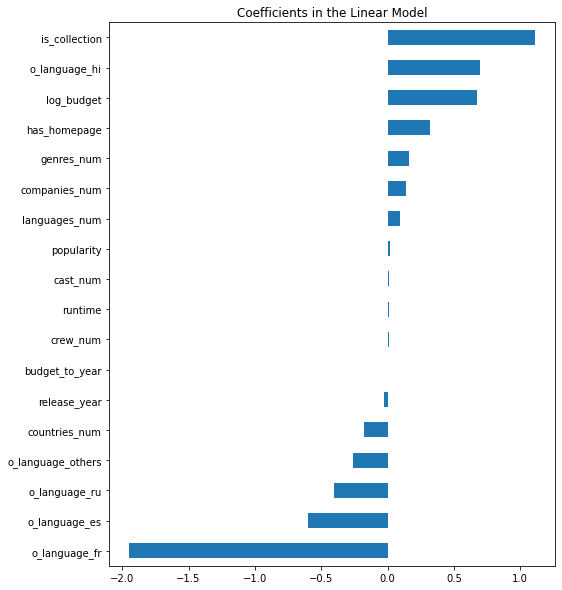

In [85]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
lr_imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Linear Model")

In [86]:
'''
Lasso
'''

'\nLasso\n'

In [87]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.0001, normalize=True)
lasso_reg.fit(X_train,y_train)
y_pred_lass =lasso_reg.predict(X_valid)

In [88]:
mse(y_valid,y_pred_lass)

5.703423539613952

In [89]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(lasso_reg)
sel_.fit(X_train,y_train)
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [90]:
'''
Random Forest
'''

'\nRandom Forest\n'

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 1695 to 1544
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         2400 non-null   float64
 1   runtime            2400 non-null   float64
 2   is_collection      2400 non-null   int64  
 3   log_budget         2400 non-null   float64
 4   genres_num         2400 non-null   int64  
 5   has_homepage       2400 non-null   int64  
 6   o_language_es      2400 non-null   uint8  
 7   o_language_fr      2400 non-null   uint8  
 8   o_language_hi      2400 non-null   uint8  
 9   o_language_others  2400 non-null   uint8  
 10  o_language_ru      2400 non-null   uint8  
 11  companies_num      2400 non-null   int64  
 12  countries_num      2400 non-null   int64  
 13  languages_num      2400 non-null   int64  
 14  release_year       2400 non-null   int64  
 15  budget_to_year     2400 non-null   float64
 16  cast_num           24

In [93]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_valid)

In [94]:
mse(y_valid,y_pred_rfr)

4.525058403846874

In [108]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfr.feature_importances_,5)})
importances = importances.sort_values('importance').set_index('feature')

In [109]:
importances

,importance
feature,
o_language_es,0.00077
o_language_ru,0.00136
o_language_hi,0.00186
has_homepage,0.00698
o_language_others,0.00917
o_language_fr,0.00979
languages_num,0.01260
is_collection,0.01369
countries_num,0.01535


Text(0.5, 1.0, 'Feature Importance')

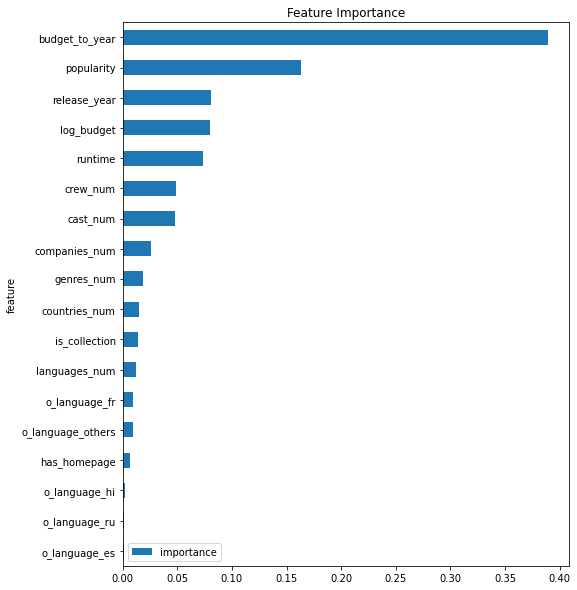

In [110]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
importances.plot(kind = "barh")
plt.title("Feature Importance")

In [98]:
r2_score(y_valid,y_pred_rfr)

0.5230846062940655

In [99]:
'''
lgb
'''

'\nlgb\n'

In [100]:
import lightgbm as lgb


In [101]:

params = {
    'objective': 'regression',
    'num_leaves': 30,
    'min_data_in_leaf':20,
    'learning_rate': 0.005,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,

    'verbose': 0
}
trainset = lgb.Dataset(X_train, y_train)


In [102]:
gbr = lgb.train(params,
                trainset,
                num_boost_round = 1000
                )

In [103]:
y_pred_gbr = gbr.predict(X_valid)

In [104]:
mse(y_valid,y_pred_gbr)

4.6238829470580365

In [105]:
r2_score(y_valid,y_pred_gbr)

0.5126690620674332

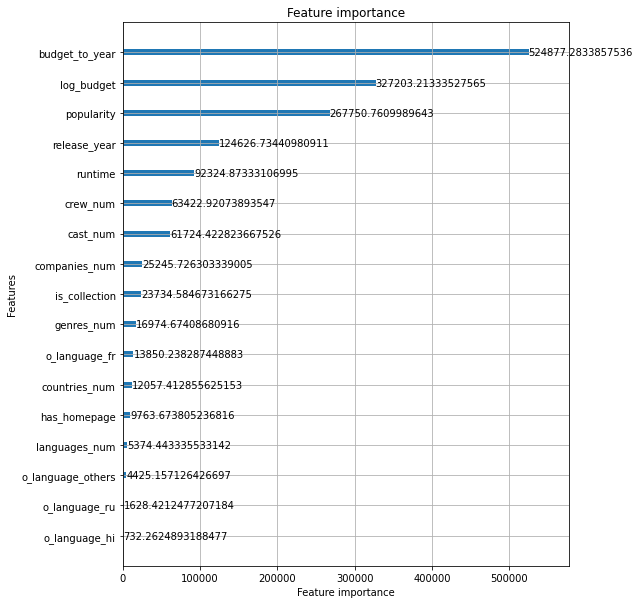

In [106]:
lgb.plot_importance(gbr,importance_type='gain')